In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\titanic (1)\train.csv")
test_df=pd.read_csv(r"C:\Users\Admin\Downloads\titanic (1)\test.csv")

In [3]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
test_df.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

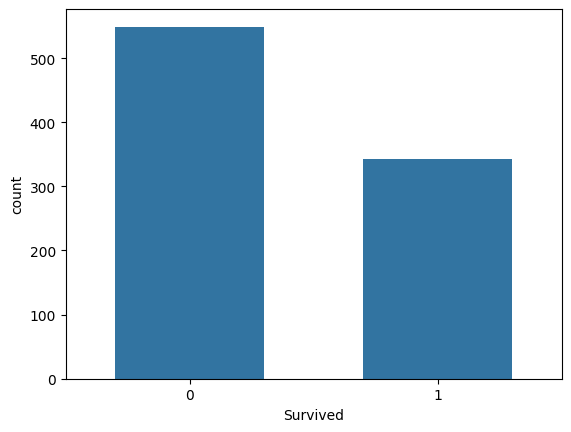

<Figure size 1200x800 with 0 Axes>

In [7]:
sns.countplot(x='Survived', data=df, width=0.6) 
plt.figure(figsize=(12, 8))
plt.show()

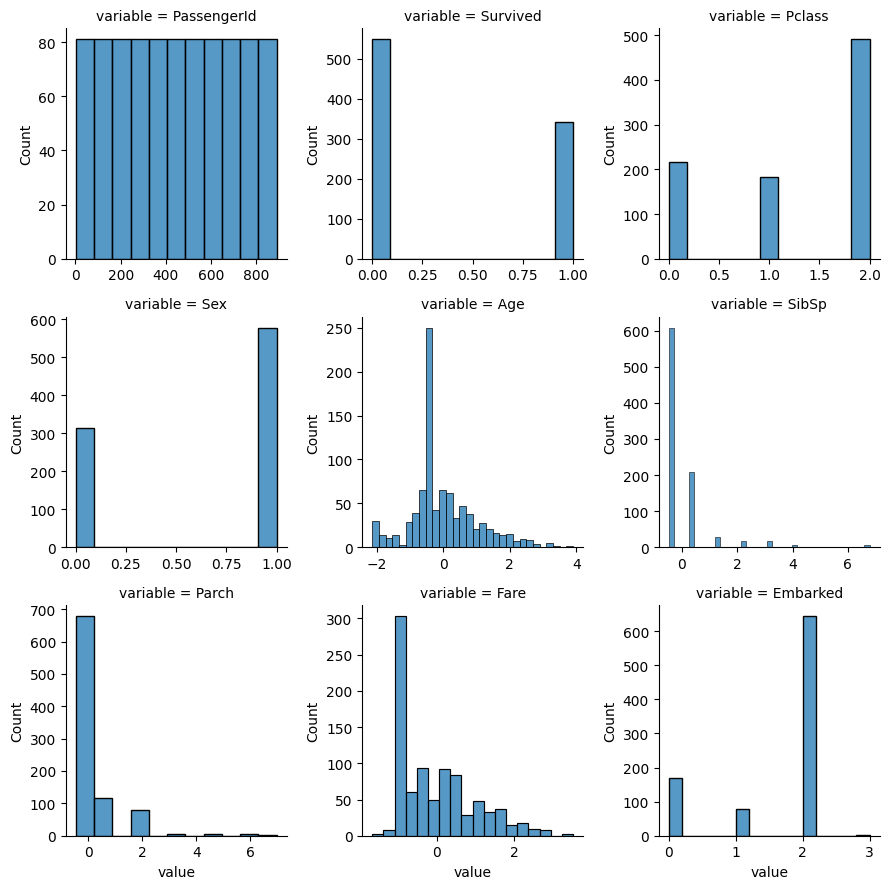

In [47]:
p=sns.FacetGrid(df.melt(),col='variable',col_wrap=3,sharex=False,sharey=False)
p.map(sns.histplot,"value")
plt.show()

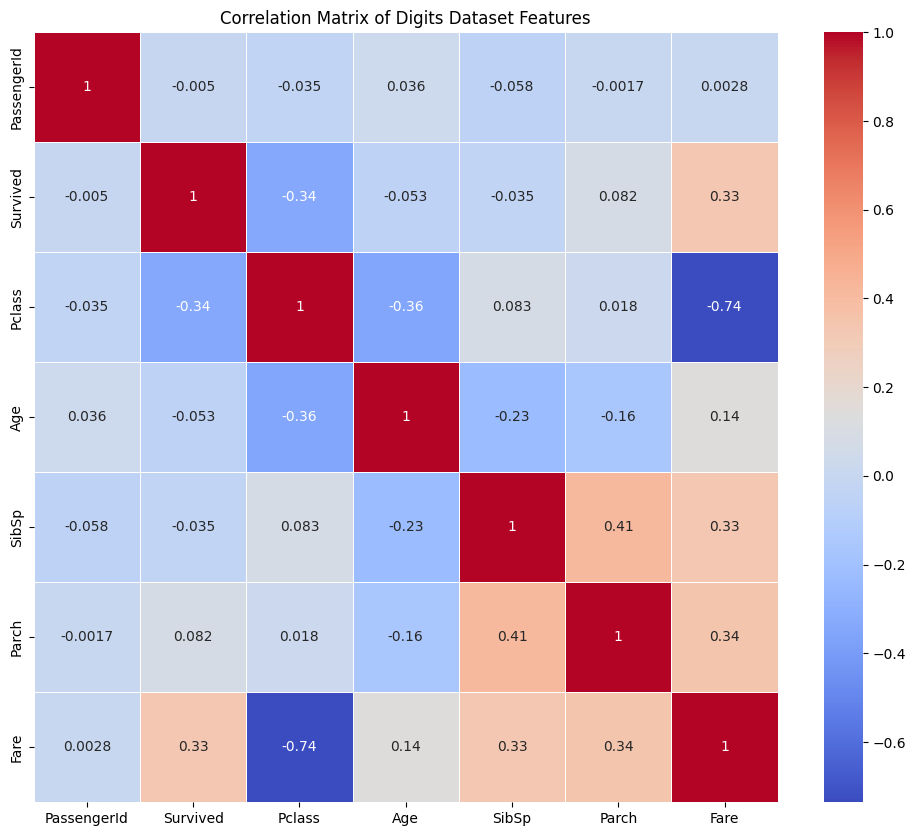

In [48]:
columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[columns].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', linewidths=0.5)
ax.set_title('Correlation Matrix of Digits Dataset Features')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(4), int32(2), int64(3)
memory usage: 55.8 KB


In [9]:
df.drop(columns='Cabin',axis=1,inplace=True)
test_df.drop(columns='Cabin',axis=1,inplace=True)

In [10]:
df['Fare']=np.log(df['Fare'])
test_df['Fare']=np.log(test_df['Fare'])

C:\Users\Admin\ANACONDA\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [12]:
test_df=test_df.drop(columns=['Name','Ticket'],axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,2.057860,Q
1,893,3,female,47.0,1,0,1.945910,S
2,894,2,male,62.0,0,0,2.270836,Q
3,895,3,male,27.0,0,0,2.159003,S
4,896,3,female,22.0,1,1,2.508582,S


In [13]:
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,1.981001,S
1,2,1,1,female,38.0,1,0,4.266662,C
2,3,1,3,female,26.0,0,0,2.070022,S
3,4,1,1,female,35.0,1,0,3.972177,S
4,5,0,3,male,35.0,0,0,2.085672,S


In [50]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [51]:
si = SimpleImputer(strategy='median')
test_df['Age']=si.fit_transform(test_df[['Age']])
test_df['SibSp']=si.fit_transform(test_df[['SibSp']])
test_df['Parch']=si.fit_transform(test_df[['Parch']])
test_df['Fare']=si.fit_transform(test_df[['Fare']])

In [28]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df['Age']=si.fit_transform(df[['Age']])
df['SibSp']=si.fit_transform(df[['SibSp']])
df['Parch']=si.fit_transform(df[['Parch']])
df['Fare']=si.fit_transform(df[['Fare']])

In [16]:
St=StandardScaler()
df['Age']=St.fit_transform(df[['Age']])
df['SibSp']=St.fit_transform(df[['SibSp']])
df['Parch']=St.fit_transform(df[['Parch']])
df['Fare']=St.fit_transform(df[['Fare']])

In [17]:
St=StandardScaler()
test_df['Age']=St.fit_transform(test_df[['Age']])
test_df['SibSp']=St.fit_transform(test_df[['SibSp']])
test_df['Parch']=St.fit_transform(test_df[['Parch']])
test_df['Fare']=St.fit_transform(test_df[['Fare']])

In [18]:
St=StandardScaler()
df['Age']=St.fit_transform(df[['Age']])
df['SibSp']=St.fit_transform(df[['SibSp']])
df['Parch']=St.fit_transform(df[['Parch']])
df['Fare']=St.fit_transform(df[['Fare']])

In [19]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df[['Sex']])
df['Embarked']=lb.fit_transform(df[['Embarked']])
df['Pclass']=lb.fit_transform(df[['Pclass']])

C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
lb=LabelEncoder()
test_df['Sex']=lb.fit_transform(test_df[['Sex']])
test_df['Embarked']=lb.fit_transform(test_df[['Embarked']])
test_df['Pclass']=lb.fit_transform(test_df[['Pclass']])

C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
X= df.drop(columns=['Survived'],axis=1)
y= df['Survived']
X_test = test_df.copy()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf=RandomForestClassifier()
mod_rf=rf.fit(X_train,y_train)

In [36]:
rf_pred=mod_rf.predict(X_val)
acc_rf=accuracy_score(y_val,rf_pred)
print(acc_rf)

0.8324022346368715


In [37]:
dc=DecisionTreeClassifier()
mod_dc=dc.fit(X_train,y_train)

In [38]:
dc_pred=mod_dc.predict(X_val)
acc_dc=accuracy_score(y_val,dc_pred)
print(acc_dc)

0.7821229050279329


In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
mod_lr=lr.fit(X_train,y_train)

In [43]:
lr_pred=mod_lr.predict(X_val)
acc_lr=accuracy_score(y_val,lr_pred)
print(acc_lr)

0.7988826815642458


In [44]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
mod_kn=kn.fit(X_train,y_train)

In [45]:
kn_pred=mod_kn.predict(X_val)
acc_kn=accuracy_score(y_val,kn_pred)
print(acc_kn)

0.5698324022346368



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



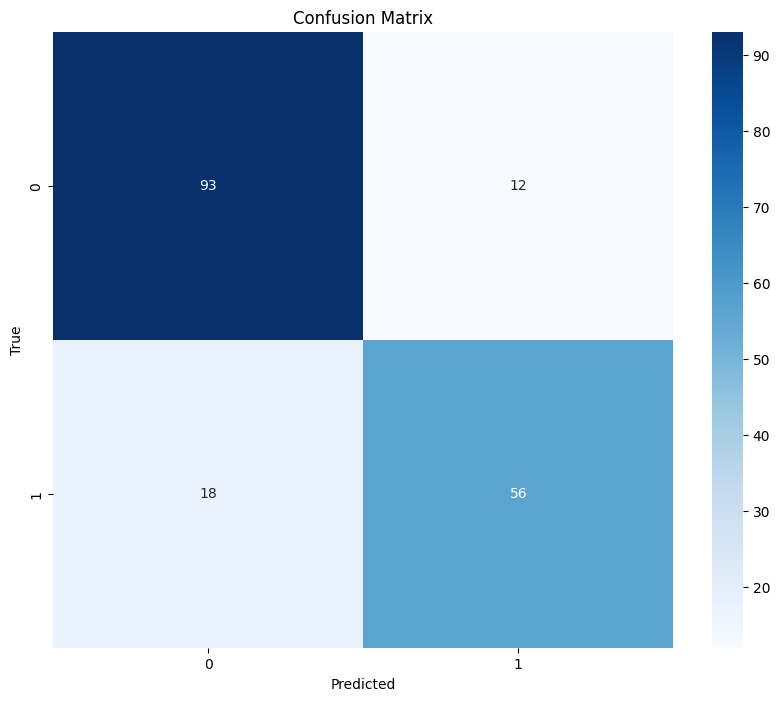

In [46]:
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_val, rf_pred))

conf_matrix = confusion_matrix(y_val, rf_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()


In [56]:
rf_pred_test=mod_rf.predict(X_test)
print(rf_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0]


In [55]:
sub = pd.read_csv(r"C:\Users\Admin\Downloads\titanic (1)\gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [57]:
sub['Survived']=rf_pred_test
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [58]:
sub.to_csv('submission.csv', index=False)